In [1]:
import numpy as np
import matplotlib.pyplot as pl
import pandas as pd
%matplotlib inline

In [2]:
df = pd.read_table("../output/out.dat", sep="\t", header=2)
df = df.rename(columns = lambda x: x.strip())
df

,EPIC number,variable name,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
0,EPIC 202060937,mix,0.005340,0.006776,0.000133,6.799343,0.016384,2376.596,1.003890
1,EPIC 202060937,logdeltaQ,-1.433720,4.177509,0.085793,-9.628500,5.910283,2114.629,1.009793
2,EPIC 202060937,logQ0,5.499966,1.004287,0.014850,3.585692,7.498930,4986.163,1.000805
3,EPIC 202060937,logperiod,1.469570,0.004162,9.788975,1.463063,1.478013,1882.440,1.006517
4,EPIC 202060937,logamp,-10.206100,1.027229,0.017052,-12.119200,-8.116290,3796.204,1.001986
...,...,...,...,...,...,...,...,...,...
2921,EPIC 202091855,logQ0,-6.362820,1.036004,0.015982,-8.605060,-4.709370,3840.536,1.001840
2922,EPIC 202091855,logperiod,2.699523,0.476666,0.007594,1.943101,3.731652,3524.848,1.002463
2923,EPIC 202091855,logamp,-15.137500,0.345556,0.003406,-15.806400,-14.455600,9285.176,0.999994
2924,EPIC 202091855,logs2,-22.252800,1.381306,0.016128,-25.117800,-19.977600,7244.717,1.000157


In [3]:
acfperiod = df[df["variable name"].str.contains("acfpeak")]['mean']
gpperiod = np.exp(df[df["variable name"].str.contains("logperiod")]['mean'])
good_gpperiod = gpperiod[(np.abs(np.array(acfperiod)-np.array(gpperiod)) < 2) & (np.array(gpperiod) > 2)]
good_acfperiod = acfperiod[(np.abs(np.array(acfperiod)-np.array(gpperiod)) < 2)  & (np.array(gpperiod) > 2)]

(array([13.,  3.,  5.,  4.,  4.,  8.,  8.,  4.,  3.,  2.]),
 array([ 2.18627023,  4.42829656,  6.6703229 ,  8.91234923, 11.15437557,
        13.3964019 , 15.63842823, 17.88045457, 20.1224809 , 22.36450724,
        24.60653357]),
 <a list of 10 Patch objects>)

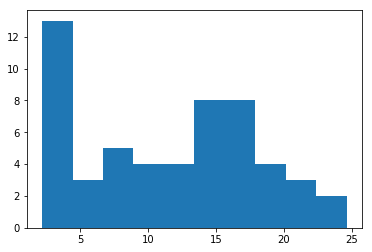

In [10]:
pl.hist(list(good_gpperiod[good_gpperiod < 35]))

(array([12.,  4.,  6.,  2.,  8.,  6.,  7.,  3.,  5.,  1.]),
 array([ 2.084012 ,  4.3978788,  6.7117456,  9.0256124, 11.3394792,
        13.653346 , 15.9672128, 18.2810796, 20.5949464, 22.9088132,
        25.22268  ]),
 <a list of 10 Patch objects>)

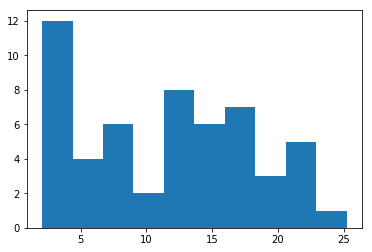

In [11]:
pl.hist(list(good_acfperiod[good_acfperiod < 35]))

In [12]:
from astroquery.vizier import Vizier
catalog_list = Vizier.find_catalogs('EPIC')
Vizier.ROW_LIMIT = 1000
catalog = Vizier.get_catalogs(list(catalog_list.keys())[0])

In [13]:
catalog[0]

ID,RAJ2000,DEJ2000,UCAC4,_2MASS,SDSS,OType,Kpflag,pmRA,e_pmRA,pmDEC,e_pmDEC,Jmag,e_Jmag,Hmag,e_Hmag,Ksmag,e_Ksmag,Kpmag,NOMAD1,f_2MASS,Prox,Kflag
,deg,deg,,,,,,mas / yr,mas / yr,mas / yr,mas / yr,mag,mag,mag,mag,mag,mag,mag,,,arcsec,
int32,float64,float64,bytes10,bytes17,bytes20,bytes8,bytes3,float64,float64,float64,float64,float32,float32,float32,float32,float32,float32,float32,bytes12,bytes19,float64,uint8
210298744,55.067843,10.608890,,03401628+1036320,,STAR,JHK,--,--,--,--,16.031,0.103,15.576,0.168,15.045,0.126,18.571,,,--,0
210299795,55.014719,10.650389,,03400353+1039014,,STAR,JHK,--,--,--,--,15.472,0.051,14.717,0.069,14.493,0.077,17.772,,,--,0
210299819,54.971342,10.651425,,03395312+1039051,,STAR,JHK,--,--,--,--,15.708,0.071,15.145,0.090,14.789,0.094,18.137,,,--,0
210300805,54.976098,10.688529,504-005574,03395427+1041184,,STAR,JHK,5.800,5.000,-10.000,5.300,14.416,0.034,13.994,0.044,13.731,0.052,16.110,,,--,0
210300557,54.944639,10.679019,,03394671+1040444,,STAR,J,--,--,--,--,16.750,0.150,--,--,--,--,18.308,,,--,0
210300598,54.947157,10.680481,,03394731+1040497,,STAR,J,--,--,--,--,15.698,0.063,15.082,0.091,14.626,0.081,17.172,,,--,0
210300653,54.944717,10.682916,,03394673+1040584,,STAR,JHK,--,--,--,--,16.406,0.115,15.588,0.130,15.607,0.174,18.460,,,--,0
210300883,54.956720,10.691447,504-005571,03394961+1041291,,STAR,gri,1.100,4.800,0.100,7.800,12.650,0.023,12.261,0.028,12.170,0.028,14.249,,,--,0


In [ ]:
Vizier.ROW_LIMIT = 100
catalog = Vizier.get_catalogs(list(catalog_list.keys())[0])
catalog[0]